### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import h2o 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import os

In [ ]:
from eli5 import show_weights

# CREATE EXPLANATIONS FOR RANDOM FOREST 
**File**: 5_explanation_eli5.ipynb

**Author**: Sebastian Benno Veuskens 

**Date**: 2024-07-28

**Data**: train and test (same as evaluated model)  


## Modify

**Working directory**

In [ ]:
os.chdir("C:/Users/Sebastian's work/OneDrive - OptiMedis AG/Dokumente/Coding/High-Cost-patient-analysis")

**Parameters & Settings**

In [ ]:
target = 'HC_Patient_Next_Year'
excluded = 'Total_Costs_Next_Year'
prediction_outcome = 1  # Indicate which prediction outcome the sample should have 

### Load data

In [ ]:
# TODO: Delete frac part
frac=0.1

train = pd.read_csv('data/complete/unbalanced/train_validate.csv', sep=',', header=0).sample(frac=frac)
test = pd.read_csv('data/complete/unbalanced/test.csv', sep=',', header=0).sample(frac=frac)

### Transform categorical values

In [ ]:
train['Sex'] = pd.factorize(train['Sex'])[0]
test['Sex'] = pd.factorize(test['Sex'])[0]

### Create train & test data set

In [ ]:
predictors = [var for var in train.columns if var not in (target, excluded)]
X_train, y_train = train[predictors], train[target]
X_test, y_test = test[predictors], test[target]

## Model training & prediction

### scikit-learn random forest

In [ ]:
model = RandomForestClassifier(n_estimators=1000, max_features=30, random_state=12345)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=30, n_estimators=1000, random_state=12345)

In [ ]:
prediction_probs = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)

### Choose sample
Sample to investigate better, choose sample with user-specified model outcome

In [ ]:
sample = X_test[model.predict(X_test) == prediction_outcome].iloc[1]

## Model evaluation
#TODO: Change all train[predictors] to X_train etc. 

### ROC-AUC

In [ ]:
fpr, tpr, _ = roc_curve(y_test, prediction_probs)
roc_auc = auc(fpr, tpr)

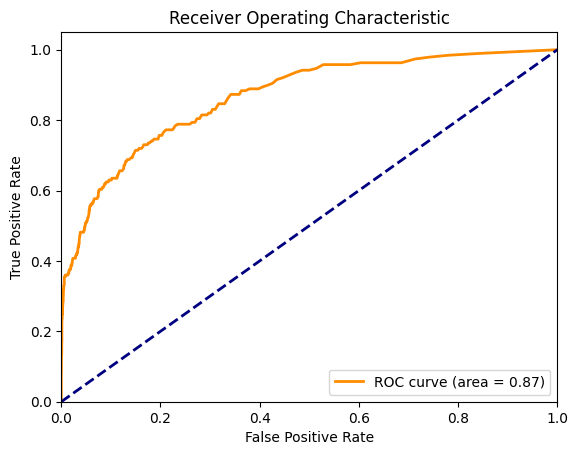

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall-AUC

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, prediction_probs)
pr_auc = auc(recall, precision)

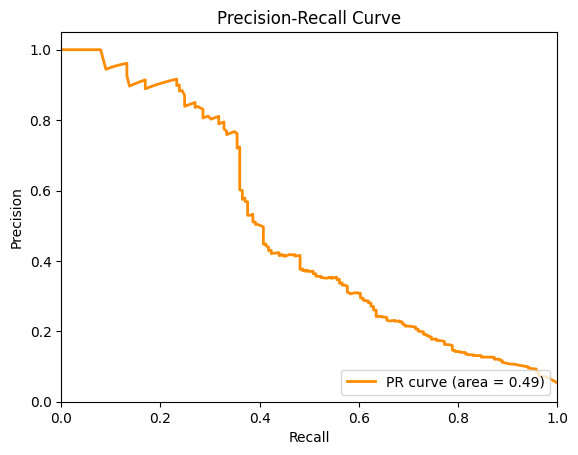

In [ ]:
# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[3341    4]
 [ 154   35]]


## XAI METHODS

### MODIFY